# Merging and Cleaning

- merging sql database with pandas df

In [1]:
import pandas as pd

In [2]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Box Office Mojo Cleaning

In [3]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
bom['movie year'] = bom['title'] +" "+ bom['year'].astype(str)

In [5]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year,movie year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


# TMDB Cleaning

In [41]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [42]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [60]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], format='%Y-%m-%d')

In [62]:
tmdb_df['movie year'] = tmdb_df['title'] + ' ' + tmdb_df['release_date'].dt.year.astype(str)

In [63]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1 2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon 2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2 2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story 1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception 2010


# The Numbers Cleaning

In [44]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [52]:
tn['release_date'] = pd.to_datetime(tn['release_date'], format='%b %d, %Y')

In [53]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [55]:
tn['movie year'] = tn['movie'] + ' ' + tn['release_date'].dt.year.astype(str)

In [56]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


# Cleaning data from clean data

In [75]:
bom_clean = bom.dropna()

- dropping null values, Microsoft is worldwide so they would be interested in movies with a worlwide audience
- movies with no domestic or foreign gross means they did not make any money meaning they were not shown at all

### Making sure there are no duplicates or nulls
- getting rid of duplictes based on popularity

In [76]:
bom_clean.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
movie year        0
dtype: int64

In [107]:
bom_clean['movie year'].duplicated().sum()

0

In [128]:
bom_clean.head()

,title,studio,domestic_gross,foreign_gross,year,movie year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


In [69]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
movie year           0
dtype: int64

In [114]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1 2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon 2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2 2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story 1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception 2010


In [113]:
tmdb_df['movie year'].duplicated().sum()

1120

In [120]:
clean_tmdb = tmdb_df.sort_values('vote_count', ascending=False).drop_duplicates('movie year', keep='first')

In [122]:
clean_tmdb.duplicated().sum()

0

In [127]:
clean_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie year
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception 2010
17383,17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175,Deadpool 2016
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,The Avengers 2012
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,Avatar 2009
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597,Interstellar 2014


In [71]:
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
movie year           0
dtype: int64

In [125]:
tn = tn.drop_duplicates('movie year', keep='first')

In [126]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


- again dropping null values since we want a worldwide audience

# Cleaning IMDB data

In [129]:
imdb = pd.read_csv('imdbCSV.csv')
imdb.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,movie_id.2,person_id,person_id.1,primary_name,birth_year,death_year,primary_profession
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,tt1375666,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer"
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,tt0848228,nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"


- getting relevant data

In [132]:
rel_imdb = imdb[['primary_title', 'genres', 'averagerating', 'numvotes', 'primary_name']]

In [133]:
rel_imdb.isna().sum()

primary_title      0
genres           798
averagerating      0
numvotes           0
primary_name       0
dtype: int64

In [135]:
rel_imdb = rel_imdb.dropna()

In [144]:
rel_imdb['genres'] = rel_imdb['genres'].str.split(',')

In [148]:
rel_imdb = rel_imdb.explode('genres')

In [149]:
rel_imdb.head()

,primary_title,genres,averagerating,numvotes,primary_name
0,Inception,Action,8.8,1841066,Christopher Nolan
0,Inception,Adventure,8.8,1841066,Christopher Nolan
0,Inception,Sci-Fi,8.8,1841066,Christopher Nolan
1,The Dark Knight Rises,Action,8.4,1387769,Christopher Nolan
1,The Dark Knight Rises,Thriller,8.4,1387769,Christopher Nolan


- higher vote counts would mean more people saw the movie, giving us the 'popular movie'
- then we can compare this to genre, giving most popular genre

In [154]:
gen_vs_pop = rel_imdb.groupby('genres')['numvotes'].mean().sort_values()[::-1]

In [158]:
genre = gen_vs_pop.index

In [159]:
genre_values = gen_vs_pop.values

## Getting popularity vs genre 

In [160]:
import matplotlib.pyplot as plt

<ipython-input-186-7ca64bfdf755>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre, rotation=45)


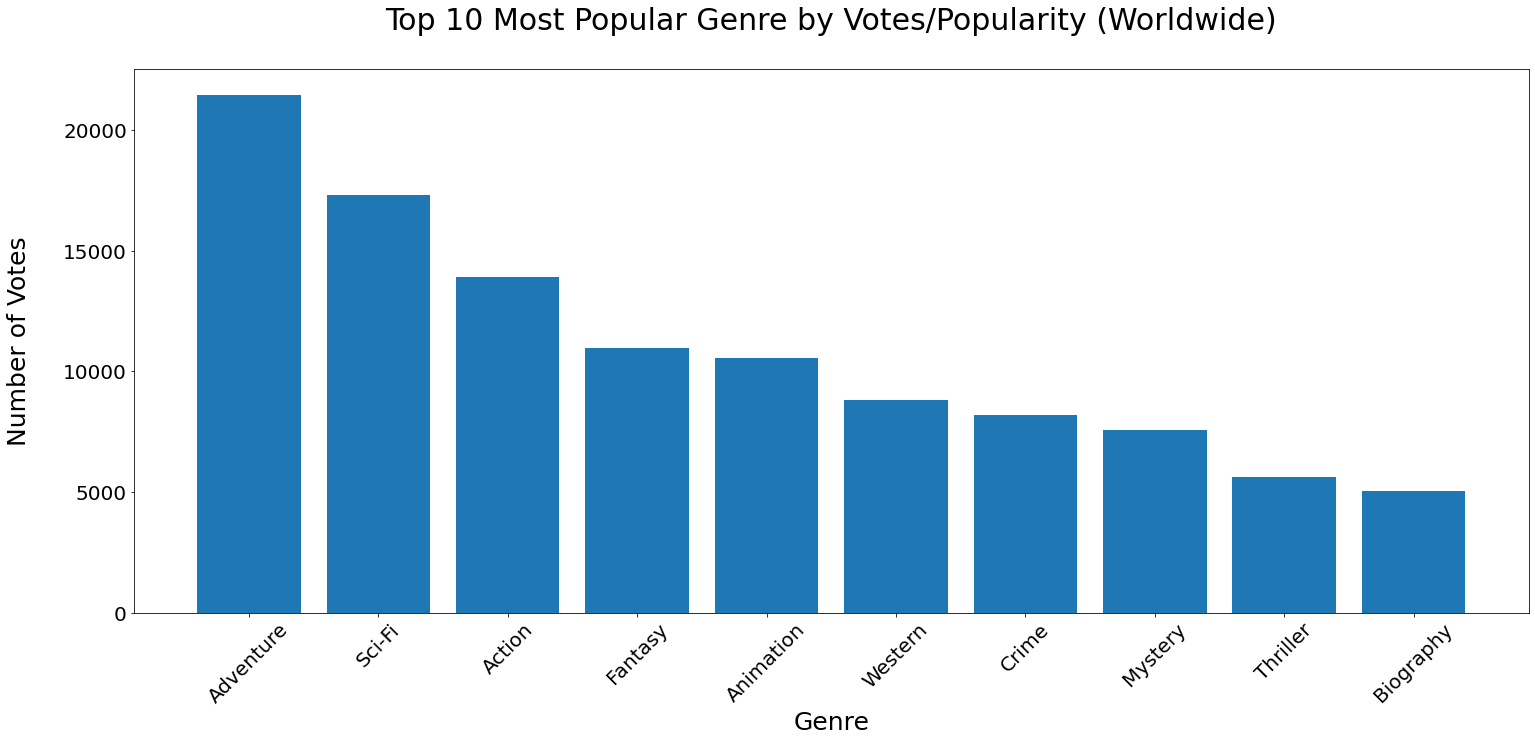

In [186]:
fi, ax = plt.subplots(figsize =(25, 10))
ax.bar(genre[:10] , genre_values[:10])
ax.set_title('Top 10 Most Popular Genre by Votes/Popularity (Worldwide)\n', fontsize = 30)
ax.set_xlabel('Genre', fontsize=25)
ax.set_ylabel('Number of Votes\n', fontsize=25)
ax.set_xticklabels(genre, rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);